# Introducton
This assignment consists of mainly three tasks to solve. The first task requires me to visualize the life expectancy of the South East Asian countries depending on whether the country classified as developed or developing. 

## Importing Libraries
To approach this task, I imported necessary python libraries such as pandas and matplotlib to visualize the data to provide sufficient insights. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Data Sets


In [2]:
df = pd.read_csv("data/LifeExpectancyData-v2.csv")
df_GDP = pd.read_csv("data/2019-GDP.csv", skiprows=3)
population = pd.read_csv("data/2020-Population.csv")
df.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5


In [3]:
df_GDP.tail(10)

,Unnamed: 0,Ranking,Unnamed: 2,Economy,US dollars),Unnamed: 5
231,LIC,NaN,NaN,Low income,"521,274",NaN
232,LMC,NaN,NaN,Lower middle income,"6,341,105",NaN
233,UMC,NaN,NaN,Upper middle income,"25,817,130",NaN
234,HIC,NaN,NaN,High income,"55,098,717",NaN
235,NaN,NaN,NaN,NaN,NaN,NaN
236,NaN,.. Not available.,NaN,NaN,NaN,NaN
237,NaN,Note: Rankings include only those economies wi...,NaN,NaN,NaN,NaN
238,NaN,a. Based on data from official statistics of U...,NaN,NaN,NaN,NaN
239,NaN,GDP data source: http://data.worldbank.org/dat...,NaN,NaN,NaN,NaN
240,NaN,GDP projections: http://data.worldbank.org/da...,NaN,NaN,NaN,NaN


In [4]:
df_GDP = df_GDP.drop(labels=0, axis=0)
df_GDP = df_GDP.drop(labels=range(235, 241), axis=0)
df_GDP = df_GDP.reset_index()

In [5]:
df_GDP.columns.tolist()

['index',
 'Unnamed: 0',
 'Ranking',
 'Unnamed: 2',
 'Economy',
 'US dollars)',
 'Unnamed: 5']

In [6]:
df_GDP = df_GDP.drop(["Unnamed: 2", "Unnamed: 5", "index"], axis=1)
df_GDP.rename(columns = {
    "Unnamed: 0":"Country",
    "US dollars)":"millions of US dollars",
}, inplace = True)

In [7]:
df_GDP

,Country,Ranking,Economy,millions of US dollars
0,USA,1,United States,"21,427,700"
1,CHN,2,China,"14,342,903"
2,JPN,3,Japan,"5,081,770"
3,DEU,4,Germany,"3,845,630"
4,IND,5,India,"2,875,142"
...,...,...,...,...
229,SSF,NaN,Sub-Saharan Africa,"1,755,011"
230,LIC,NaN,Low income,"521,274"
231,LMC,NaN,Lower middle income,"6,341,105"
232,UMC,NaN,Upper middle income,"25,817,130"


In [8]:
SEA_countries=["Malaysia", "Brunei Darussalam", "Thailand",
               "Indonesia", "Lao People's Democratic Republic", "Myanmar", 
               "Singapore", "Timor-Leste", "Philippines",
              "Viet Nam", "Cambodia", "Lao PDR", "Vietnam"
              ]
for i in range(len(df["country"])):
    if df["country"][i] not in SEA_countries:
        df=df.drop([i])
df.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
368,Brunei Darussalam,2015,Developing,77.7,0,78.0,41.2,NaN,99.0,4,99.0,99.0,0.1,0.864,14.9
369,Brunei Darussalam,2014,Developing,77.6,0,8.0,4.2,0.01,99.0,1,99.0,99.0,0.1,0.863,15.0
370,Brunei Darussalam,2013,Developing,77.1,0,84.0,39.2,0.01,98.0,0,99.0,99.0,0.1,0.860,14.9
371,Brunei Darussalam,2012,Developing,78.3,0,79.0,38.2,0.01,99.0,1,99.0,99.0,0.1,0.852,14.4
372,Brunei Darussalam,2011,Developing,77.4,0,79.0,37.2,0.97,93.0,4,99.0,97.0,0.1,0.846,14.1


In [9]:
print(df.columns.tolist())

['country', 'Year', 'Status', 'Life expectancy ', 'infant deaths', 'Adult Mortality', ' BMI ', 'Alcohol consumption', 'Hepatitis B', 'Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']


In [10]:
df_subset = df.drop(["Polio", "Year", "infant deaths", "Adult Mortality", "Measles ", "Alcohol consumption", "Hepatitis B", "Polio", "Diphtheria ", " HIV/AIDS",], axis=1)

In [11]:
df_subset = df_subset.groupby(["country", "Status"]).agg({
    "Life expectancy ": {"max", "mean"},
    " BMI ": "mean",
    "Income composition of resources": "mean",
    "Schooling": "mean"
    })
df_subset.columns = ["_".join(x) for x in df_subset.columns.ravel()]
df_subset.rename(columns = {
    "Life expectancy _mean":"mean_life_expectancy",
    "Life expectancy _max":"max_life_expectancy",
    " BMI _mean":"mean_BMI",
    "Income composition of resources_mean":"mean_income_composition_of_resources",
    "Schooling_mean":"mean_schooling"
}, inplace = True)
df_subset.head(10)

<ipython-input-11-05216d30f89c>:7: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_subset.columns = ["_".join(x) for x in df_subset.columns.ravel()]


,,mean_life_expectancy,max_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
country,Status,,,,,
Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625
Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500
Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250
Lao People's Democratic Republic,Developing,62.38125,65.7,14.36250,0.515625,9.23125
Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250
Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500
Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375
Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125
Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000


In [12]:
df_subset = df_subset.reset_index()
df_subset.head(10)

,country,Status,mean_life_expectancy,max_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
0,Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625
1,Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500
2,Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250
3,Lao People's Democratic Republic,Developing,62.38125,65.7,14.36250,0.515625,9.23125
4,Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250
5,Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500
6,Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375
7,Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125
8,Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000
9,Timor-Leste,Developing,64.75625,68.3,14.55000,0.517625,10.70000


In [13]:
df_subset[["country","Status","max_life_expectancy", "mean_life_expectancy"]].sort_values(by=["max_life_expectancy"])

,country,Status,max_life_expectancy,mean_life_expectancy
3,Lao People's Democratic Republic,Developing,65.7,62.38125
5,Myanmar,Developing,66.6,64.20000
9,Timor-Leste,Developing,68.3,64.75625
6,Philippines,Developing,68.5,67.57500
1,Cambodia,Developing,68.7,64.34375
2,Indonesia,Developing,69.1,67.55625
8,Thailand,Developing,74.9,73.08125
4,Malaysia,Developing,75.0,73.75625
10,Viet Nam,Developing,76.0,74.77500
0,Brunei Darussalam,Developing,78.3,76.48750


The above data shows the data of the max_life_expectancy in the ascending order. By looking at the "Status" column, we can see that Singapore is the only country that is classified as Developed, where every other country is specified as a Developing country. As the table shows, Singapore (Developed Country) is placed at the bottom, where the order is organized in the ascending order for the life_expectancy for each South East Asian countries. This result clearly illustrates that the Developed country has a tendancy of having higher maximum and mean life expectancy compared to the non-developed countries. 

## Question 2

In [14]:
df.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
368,Brunei Darussalam,2015,Developing,77.7,0,78.0,41.2,NaN,99.0,4,99.0,99.0,0.1,0.864,14.9
369,Brunei Darussalam,2014,Developing,77.6,0,8.0,4.2,0.01,99.0,1,99.0,99.0,0.1,0.863,15.0
370,Brunei Darussalam,2013,Developing,77.1,0,84.0,39.2,0.01,98.0,0,99.0,99.0,0.1,0.860,14.9
371,Brunei Darussalam,2012,Developing,78.3,0,79.0,38.2,0.01,99.0,1,99.0,99.0,0.1,0.852,14.4
372,Brunei Darussalam,2011,Developing,77.4,0,79.0,37.2,0.97,93.0,4,99.0,97.0,0.1,0.846,14.1


In [15]:
df_population = pd.read_csv("data/2020-Population.csv", skiprows=16)
df_per_capita = df_population
df_population

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
285,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
286,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6


In [16]:
df_population.columns.tolist()

['Index',
 'Variant',
 'Region, subregion, country or area *',
 'Notes',
 'Country code',
 'Type',
 'Parent code',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [17]:
for i in range(len(df_population["Region, subregion, country or area *"])):
    if df_population["Region, subregion, country or area *"][i] not in SEA_countries:
        df_population=df_population.drop([i])
for i in range(len(df_per_capita["Region, subregion, country or area *"])):
    if df_per_capita["Region, subregion, country or area *"][i] not in SEA_countries:
        df_per_capita=df_per_capita.drop([i])




#df_population["Region, subregion, country or area *"]


In [18]:
df_population.head(10)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
136,137,Estimates,Brunei Darussalam,NaN,96,Country/Area,920,48,51,54,...,394,399,404,410,415,420,424,429,433,437
137,138,Estimates,Cambodia,NaN,116,Country/Area,920,4 433,4 538,4 656,...,14 541,14 780,15 026,15 275,15 521,15 766,16 009,16 250,16 487,16 719
138,139,Estimates,Indonesia,NaN,360,Country/Area,920,69 543,70 849,72 275,...,245 116,248 452,251 805,255 128,258 383,261 556,264 651,267 671,270 626,273 524
139,140,Estimates,Lao People's Democratic Republic,NaN,418,Country/Area,920,1 683,1 723,1 764,...,6 348,6 445,6 541,6 640,6 741,6 846,6 953,7 061,7 169,7 276
140,141,Estimates,Malaysia,13,458,Country/Area,920,6 110,6 271,6 450,...,28 651,29 068,29 469,29 867,30 271,30 685,31 105,31 528,31 950,32 366
141,142,Estimates,Myanmar,NaN,104,Country/Area,920,17 780,18 104,18 441,...,50 991,51 414,51 852,52 281,52 681,53 045,53 383,53 708,54 045,54 410
142,143,Estimates,Philippines,NaN,608,Country/Area,920,18 580,19 247,19 945,...,95 570,97 213,98 872,100 513,102 113,103 664,105 173,106 651,108 117,109 581
143,144,Estimates,Singapore,NaN,702,Country/Area,920,1 022,1 068,1 120,...,5 264,5 369,5 454,5 526,5 592,5 654,5 708,5 758,5 804,5 850
144,145,Estimates,Thailand,NaN,764,Country/Area,920,20 710,21 263,21 838,...,67 518,67 836,68 145,68 439,68 715,68 971,69 210,69 428,69 626,69 800
145,146,Estimates,Timor-Leste,NaN,626,Country/Area,920,415,419,423,...,1 113,1 133,1 153,1 174,1 196,1 219,1 243,1 268,1 293,1 318


In [19]:
df_population = df_population.drop(["Index","Variant", "Notes", "Country code", "Type", "Parent code"], axis=1)
df_population.head()
df_per_capita = df_per_capita.drop(["Index","Variant", "Notes", "Country code", "Type", "Parent code"], axis=1)


In [20]:
for i in df_population.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        if int(i) >= 1950 and int(i) < 2000:
            df_population = df_population.drop(i, axis=1)
        elif int(i) > 2015:
            df_population = df_population.drop(i, axis=1)
        
for i in df_per_capita.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        if int(i) != 2019:
            df_per_capita = df_per_capita.drop(i, axis=1)
df_population.head()

,"Region, subregion, country or area *",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
136,Brunei Darussalam,333,340,347,353,359,365,370,375,379,384,389,394,399,404,410,415
137,Cambodia,12 155,12 405,12 638,12 856,13 066,13 273,13 478,13 680,13 884,14 094,14 312,14 541,14 780,15 026,15 275,15 521
138,Indonesia,211 514,214 427,217 358,220 309,223 286,226 289,229 318,232 374,235 470,238 621,241 834,245 116,248 452,251 805,255 128,258 383
139,Lao People's Democratic Republic,5 324,5 410,5 493,5 577,5 662,5 752,5 846,5 945,6 047,6 149,6 249,6 348,6 445,6 541,6 640,6 741
140,Malaysia,23 194,23 709,24 208,24 699,25 191,25 691,26 202,26 720,27 236,27 735,28 208,28 651,29 068,29 469,29 867,30 271


In [21]:

for i in df_GDP.columns.tolist():
    if str(i) == "millions of US dollars":
        #df_per_capita_GDP[i] = df_per_capita_GDP[i].str.replace(" ","")
        df_GDP[i] = df_GDP[i].str.replace(",","")
df_GDP

,Country,Ranking,Economy,millions of US dollars
0,USA,1,United States,21427700
1,CHN,2,China,14342903
2,JPN,3,Japan,5081770
3,DEU,4,Germany,3845630
4,IND,5,India,2875142
...,...,...,...,...
229,SSF,NaN,Sub-Saharan Africa,1755011
230,LIC,NaN,Low income,521274
231,LMC,NaN,Lower middle income,6341105
232,UMC,NaN,Upper middle income,25817130


In [22]:
print(df_population.dtypes)

Region, subregion, country or area *    object
2000                                    object
2001                                    object
2002                                    object
2003                                    object
2004                                    object
2005                                    object
2006                                    object
2007                                    object
2008                                    object
2009                                    object
2010                                    object
2011                                    object
2012                                    object
2013                                    object
2014                                    object
2015                                    object
dtype: object


In [23]:
for i in df_population.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        df_population[i] = df_population[i].str.replace(" ","")
for i in df_per_capita.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        df_per_capita[i] = df_per_capita[i].str.replace(" ","")
print(df_population["2000"].tolist())

['333', '12155', '211514', '5324', '23194', '46720', '77992', '4029', '62953', '884', '79910']


In [24]:
for i in df_population.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        df_population[i] = df_population[i].astype(int)
#df_population.head()
for i in df_per_capita.columns.tolist():
    if str(i) != "Region, subregion, country or area *":
        df_per_capita[i] = df_per_capita[i].astype(int)


In [25]:
for i in range(len(df_GDP["Economy"])):
    if df_GDP["Economy"][i] not in SEA_countries:
        df_GDP=df_GDP.drop([i])
df_per_capita = df_per_capita.sort_values("Region, subregion, country or area *")
df_per_capita = df_per_capita.reset_index()

In [26]:
df_GDP = df_GDP.sort_values("Economy")
df_GDP = df_GDP.reset_index()

In [27]:
df_per_capita_GDP = pd.concat([df_per_capita, df_GDP], axis=1)
df_per_capita_GDP = df_per_capita_GDP.drop(["index", "Country", "Ranking", "Economy"],axis=1)

In [28]:
df_per_capita_GDP["2019"] = df_per_capita_GDP["2019"]*1000
df_per_capita_GDP["millions of US dollars"] = df_per_capita_GDP["millions of US dollars"].astype(int)
df_per_capita_GDP["millions of US dollars"] = (df_per_capita_GDP["millions of US dollars"]*1000000)
df_per_capita_GDP["perCapitaGDP"] = (df_per_capita_GDP["millions of US dollars"]/df_per_capita_GDP["2019"]).round(2)
df_per_capita_GDP.rename(columns = {
    "2019":"Population_2019"
}, inplace = True)
df_per_capita_GDP

,"Region, subregion, country or area *",Population_2019,millions of US dollars,perCapitaGDP
0,Brunei Darussalam,433000,13469000000,31106.24
1,Cambodia,16487000,27089000000,1643.05
2,Indonesia,270626000,1119191000000,4135.56
3,Lao People's Democratic Republic,7169000,18174000000,2535.08
4,Malaysia,31950000,364702000000,11414.77
5,Myanmar,54045000,76086000000,1407.83
6,Philippines,108117000,376796000000,3485.08
7,Singapore,5804000,372063000000,64104.58
8,Thailand,69626000,543650000000,7808.15
9,Timor-Leste,1293000,1674000000,1294.66


In [38]:
df_final = pd.concat([df_subset, df_per_capita_GDP], axis=1)
df_final = df_final.drop(["Region, subregion, country or area *"], axis=1)
df_final

,country,Status,mean_life_expectancy,max_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,Population_2019,millions of US dollars,perCapitaGDP
0,Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625,433000,13469000000,31106.24
1,Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500,16487000,27089000000,1643.05
2,Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250,270626000,1119191000000,4135.56
3,Lao People's Democratic Republic,Developing,62.38125,65.7,14.36250,0.515625,9.23125,7169000,18174000000,2535.08
4,Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250,31950000,364702000000,11414.77
5,Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500,54045000,76086000000,1407.83
6,Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375,108117000,376796000000,3485.08
7,Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125,5804000,372063000000,64104.58
8,Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000,69626000,543650000000,7808.15
9,Timor-Leste,Developing,64.75625,68.3,14.55000,0.517625,10.70000,1293000,1674000000,1294.66


In [30]:
df_population["mean"] = df_population.mean(axis=1)
df_population["mean"] = df_population['mean'].round(decimals = 1)
df_population = df_population.reset_index()
df_population

<ipython-input-30-6156f2277b53>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_population["mean"] = df_population.mean(axis=1)


,index,"Region, subregion, country or area *",2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
0,136,Brunei Darussalam,333,340,347,353,359,365,370,375,379,384,389,394,399,404,410,415,376.0
1,137,Cambodia,12155,12405,12638,12856,13066,13273,13478,13680,13884,14094,14312,14541,14780,15026,15275,15521,13811.5
2,138,Indonesia,211514,214427,217358,220309,223286,226289,229318,232374,235470,238621,241834,245116,248452,251805,255128,258383,234355.2
3,139,Lao People's Democratic Republic,5324,5410,5493,5577,5662,5752,5846,5945,6047,6149,6249,6348,6445,6541,6640,6741,6010.6
4,140,Malaysia,23194,23709,24208,24699,25191,25691,26202,26720,27236,27735,28208,28651,29068,29469,29867,30271,26882.4
5,141,Myanmar,46720,47225,47702,48149,48564,48950,49301,49621,49930,50250,50601,50991,51414,51852,52281,52681,49764.5
6,142,Philippines,77992,79673,81365,83052,84711,86326,87889,89405,90902,92414,93967,95570,97213,98872,100513,102113,90123.6
7,143,Singapore,4029,4077,4104,4129,4177,4266,4402,4579,4776,4967,5131,5264,5369,5454,5526,5592,4740.1
8,144,Thailand,62953,63539,64069,64550,64995,65416,65813,66182,66531,66867,67195,67518,67836,68145,68439,68715,66172.7
9,145,Timor-Leste,884,901,923,947,972,995,1016,1036,1055,1074,1094,1113,1133,1153,1174,1196,1041.6


In [31]:
df_mean_mortality = df.groupby(["country"]).agg({
    "Adult Mortality": "mean"
    })
df_mean_mortality = df_mean_mortality.reset_index()
df_mean_mortality

,country,Adult Mortality
0,Brunei Darussalam,67.0625
1,Cambodia,196.3750
2,Indonesia,166.5625
3,Lao People's Democratic Republic,197.1875
4,Malaysia,118.5625
5,Myanmar,154.3125
6,Philippines,217.9375
7,Singapore,62.0000
8,Thailand,160.3750
9,Timor-Leste,170.3750


In [32]:
df_mean_mortality["mean_life_expectancy"] = df_subset["mean_life_expectancy"]
df_mean_mortality["population"] = df_population["mean"]
df_mean_mortality

,country,Adult Mortality,mean_life_expectancy,population
0,Brunei Darussalam,67.0625,76.48750,376.0
1,Cambodia,196.3750,64.34375,13811.5
2,Indonesia,166.5625,67.55625,234355.2
3,Lao People's Democratic Republic,197.1875,62.38125,6010.6
4,Malaysia,118.5625,73.75625,26882.4
5,Myanmar,154.3125,64.20000,49764.5
6,Philippines,217.9375,67.57500,90123.6
7,Singapore,62.0000,81.47500,4740.1
8,Thailand,160.3750,73.08125,66172.7
9,Timor-Leste,170.3750,64.75625,1041.6


<AxesSubplot:>

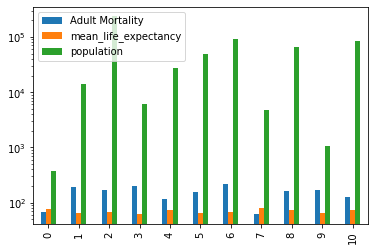

In [33]:
df_mean_mortality.plot(kind="bar", logy=True)

In [34]:
df_mean_mortality["population"] = (df_mean_mortality["population"]/100)
df_mean_mortality = df_mean_mortality.round(2)
df_mean_mortality

,country,Adult Mortality,mean_life_expectancy,population
0,Brunei Darussalam,67.06,76.49,3.76
1,Cambodia,196.38,64.34,138.12
2,Indonesia,166.56,67.56,2343.55
3,Lao People's Democratic Republic,197.19,62.38,60.11
4,Malaysia,118.56,73.76,268.82
5,Myanmar,154.31,64.20,497.64
6,Philippines,217.94,67.58,901.24
7,Singapore,62.00,81.47,47.40
8,Thailand,160.38,73.08,661.73
9,Timor-Leste,170.38,64.76,10.42


<AxesSubplot:>

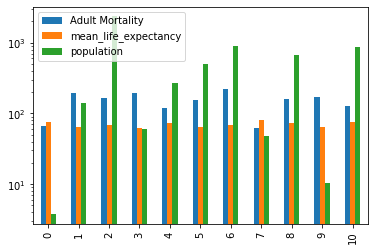

In [35]:
df_mean_mortality.plot(kind="bar", logy=True)

## Question 3


In [36]:
df_singapore = pd.read_csv("data/LifeExpectancyData-v2.csv")
SEA_countries=["Singapore"]
for i in range(len(df_singapore["country"])):
    if df_singapore["country"][i] not in SEA_countries:
        df_singapore=df_singapore.drop([i])
df_singapore.head(6)

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
2313,Singapore,2015,Developed,83.1,0,55.0,33.2,1.79,96.0,0,96.0,96.0,0.1,0.924,15.4
2314,Singapore,2014,Developed,82.9,0,56.0,32.9,1.83,96.0,0,96.0,96.0,0.1,0.922,15.4
2315,Singapore,2013,Developed,82.7,0,57.0,32.7,1.83,97.0,138,97.0,97.0,0.1,0.920,15.4
2316,Singapore,2012,Developed,82.5,0,59.0,32.4,1.89,97.0,42,97.0,97.0,0.1,0.917,15.4
2317,Singapore,2011,Developed,82.2,0,6.0,32.1,1.80,96.0,148,96.0,96.0,0.1,0.911,15.2
2318,Singapore,2010,Developed,82.0,0,61.0,31.8,1.84,96.0,50,96.0,96.0,0.1,0.889,14.5


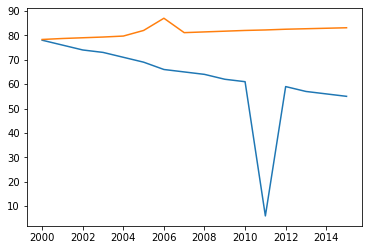

In [37]:
x = df_singapore["Year"]
y = df_singapore["Adult Mortality"]
y1 = df_singapore["Life expectancy "]
plt.plot(x, y)
plt.plot(x, y1)